# Import the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
from sklearn import set_config
set_config(display='diagram')

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [18]:
# Desorption about whole dataset
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

# Train Test Split

In [4]:
X=data.data
y=data.target

In [20]:
print(X.shape, y.shape)

(442, 10) (442,)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [22]:
# help for debugging
print(X_train.shape, X_test.shape)

(353, 10) (89, 10)


In [24]:
print(y_train.shape, y_test.shape)

(353,) (89,)


# Apply Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [7]:
L.fit(X_train,y_train)

LinearRegression()

In [8]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred=L.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


# Apply the Ridge

In [11]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [12]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [13]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [14]:
y_pred1=R.predict(X_test)

In [15]:
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score -0.00042490200441935855
RMSE 70.25956272917782


# Create a polynomial dataset  

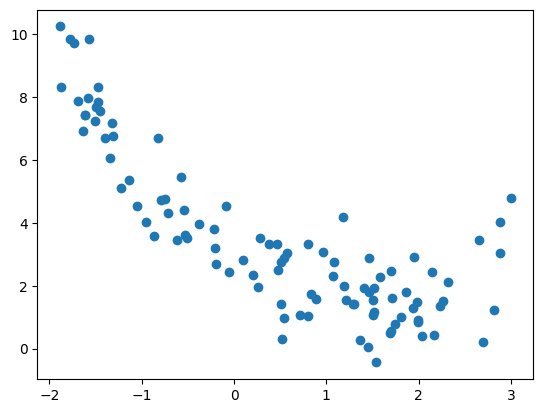

In [ ]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

In [28]:
# Due to we do in loop so we use the pipeline
from sklearn.pipeline import Pipeline

# Our Dataset is polynomial so we import this libraries
from sklearn.preprocessing import PolynomialFeatures

# Introduce the alpha 
- It is a hyperparameter
- use to regularized the our loss function

In [76]:
# Create a function to predict the points

def get_prediction_on_ridge(X, y, alpha):
    """ Give the Prediction on the given x, y and alpha"""
    model = Pipeline(
        [
            ('poly_features', PolynomialFeatures(degree=16)), 
            ('ridge', Ridge(alpha=alpha)),
        ]
    )
    
    # fit the parameter to model
    model.fit(X, y)
    
    return model.predict(X)
    

alpha 
- 0 ->  Under fitting 
- 20 -> Best fit line
- 200 -> over fitting 

In [77]:
# Create a list 
alphas = [0, 20, 200]
colors = ['r', 'g', 'b']

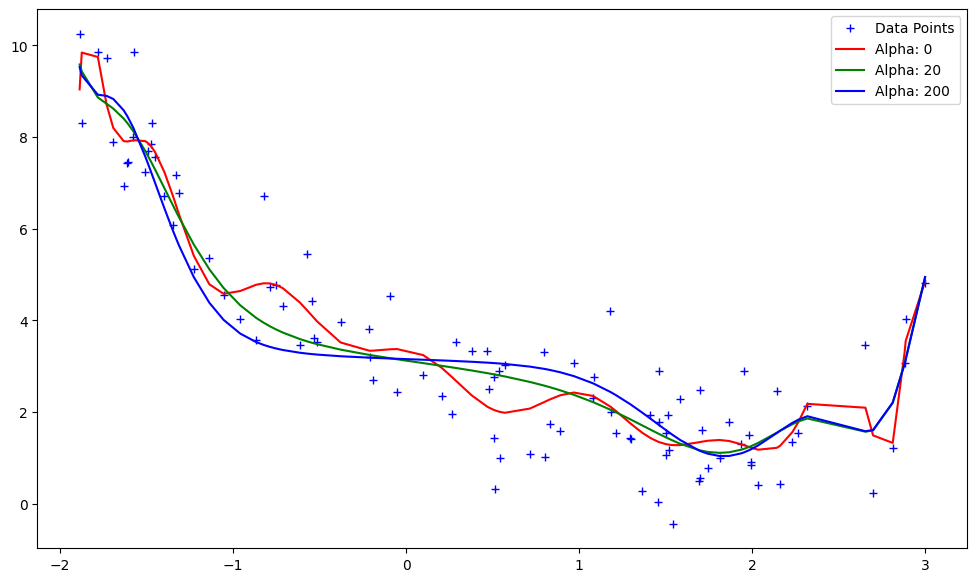

In [78]:
plt.figure(figsize=(12, 7))
plt.plot(x1, x2, 'b+', label='Data Points')  # Plot raw data

# Loop over alphas and corresponding colors
for alpha, color in zip(alphas, colors):
    pred = get_prediction_on_ridge(x1, x2, alpha=alpha)  # Get predictions
    sorted_idx = np.argsort(x1[:, 0])  # Sort x for a smooth line
    plt.plot(x1[sorted_idx, 0], pred[sorted_idx], color=color, label=f'Alpha: {alpha}')

plt.legend()
plt.show()


**Alpha Decide :**

- 0 (Red line) ->  Under fitting 
- 20 (Green line) -> Best fit line
- 200 (Blue line) -> over fitting 

In [79]:
sorted(x1[:, 0])

[np.float64(-1.8866377466442945),
 np.float64(-1.8742592609554591),
 np.float64(-1.78134256808591),
 np.float64(-1.7303949035027597),
 np.float64(-1.69211646548984),
 np.float64(-1.632039402048015),
 np.float64(-1.6113320271705631),
 np.float64(-1.6093397110830066),
 np.float64(-1.5784729216723785),
 np.float64(-1.574277629921391),
 np.float64(-1.5071628486857718),
 np.float64(-1.4940774126440974),
 np.float64(-1.4760583058688002),
 np.float64(-1.4695451526065222),
 np.float64(-1.449959044732788),
 np.float64(-1.3963493444329278),
 np.float64(-1.3490293665776714),
 np.float64(-1.3270841229192358),
 np.float64(-1.311230677366396),
 np.float64(-1.2264041974494537),
 np.float64(-1.1369026342621884),
 np.float64(-1.0548313588277325),
 np.float64(-0.9587858487941237),
 np.float64(-0.8674964236465552),
 np.float64(-0.8225500926568856),
 np.float64(-0.7873177985729072),
 np.float64(-0.7522062591514067),
 np.float64(-0.7129540538999755),
 np.float64(-0.6156987963716554),
 np.float64(-0.5729542

In [80]:
np.argsort(x1[:, 0])

array([32, 46, 43, 93, 54, 80, 83, 62, 65, 38, 89, 47, 49, 98, 18, 36, 31,
       81, 26, 55,  2, 11, 77, 23, 16, 45, 99,  6, 25, 42,  4, 29,  7, 40,
       20,  5, 39, 87, 73,  8, 64, 82, 63, 51, 57, 75, 53, 24, 92, 88, 95,
       10,  9, 17, 84, 19, 13, 96, 86, 22, 44, 91, 60, 76, 50, 28, 74, 14,
       34, 59, 21, 41, 70, 27, 12, 30, 67, 79, 58, 33, 94, 61, 71, 35, 68,
        3, 66, 56, 15,  0, 48, 78,  1, 37, 72, 97, 52, 69, 85, 90])

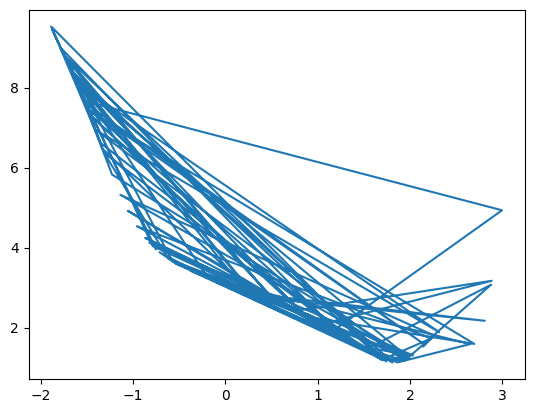

In [81]:
preds = get_prediction_on_ridge(x1, x2, alpha=10)
plt.plot(x1, preds)
plt.show()

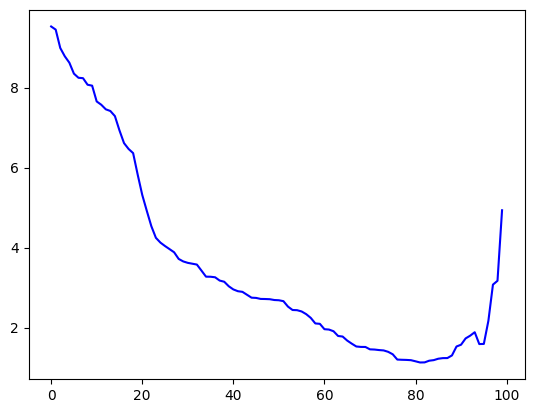

In [82]:
preds = get_prediction_on_ridge(x1, x2, alpha=10)
plt.plot(preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))
    